In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Make some noise!

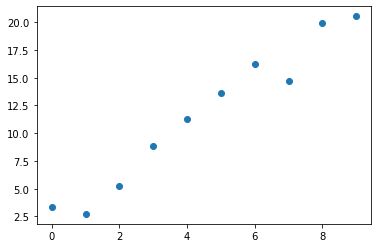

In [4]:
x = np.arange(10, dtype=np.float32)
y = 2 * x + 3
y += np.random.normal(scale=2, size=10)

plt.scatter(x, y);

## Act normal

In [5]:
class Normalize:
  def fit(self, x):
    self.avg = np.mean(x)
    self.std = np.std(x)

  def transform(self, x):
    return (x - self.avg) / self.std

In [6]:
nor = Normalize()
nor.fit(x)
x_train = torch.from_numpy(nor.transform(x).reshape(-1, 1))
y_train = torch.from_numpy(y)


## Build the model

In [7]:
class LinReg:
  def __init__(self, lr=0.001):
    self.weight = torch.randn(1, requires_grad=True)
    self.bias = torch.zeros(1, requires_grad=True)
    self.lr = lr

  def __call__(self, x):
    return x @ self.weight + self.bias

  def update(self):
    with torch.no_grad():
      self.weight -= self.lr * self.weight.grad
      self.bias -= self.lr * self.bias.grad
      self.weight.grad.zero_()
      self.bias.grad.zero_()


def loss(y, y_hat):
  return (y - y_hat).pow(2).mean()

def r_2(y, y_hat):
  ssr = np.sum((y - y_hat) ** 2)
  sst = np.sum((y - np.mean(y)) ** 2)
  return 1 - ssr / sst

def train(model, x, y, epochs, verbose=10):
  for epoch in range(1, epochs + 1):
    pred = model(x)
    l = loss(y, pred)
    l.backward()
    model.update()
    if epoch % verbose == 0:
      print(f'Epoch {epoch} - Loss {l.item():.4f}')


## Do it!

In [8]:
model = LinReg(lr=0.01)
train(model, x_train, y_train, 200)

Epoch 10 - Loss 112.3800
Epoch 20 - Loss 75.5158
Epoch 30 - Loss 50.9049
Epoch 40 - Loss 34.4745
Epoch 50 - Loss 23.5054
Epoch 60 - Loss 16.1824
Epoch 70 - Loss 11.2935
Epoch 80 - Loss 8.0296
Epoch 90 - Loss 5.8506
Epoch 100 - Loss 4.3959
Epoch 110 - Loss 3.4247
Epoch 120 - Loss 2.7764
Epoch 130 - Loss 2.3435
Epoch 140 - Loss 2.0545
Epoch 150 - Loss 1.8616
Epoch 160 - Loss 1.7328
Epoch 170 - Loss 1.6468
Epoch 180 - Loss 1.5894
Epoch 190 - Loss 1.5511
Epoch 200 - Loss 1.5255


## Evaluate

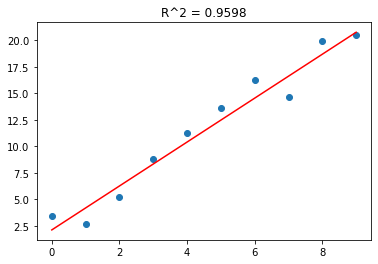

In [9]:
y_hat = model(x_train).detach().numpy()

r = r_2(y, y_hat)

plt.scatter(x, y)
plt.plot(x, y_hat, color='red')
plt.title(f'R^2 = {r:.4f}')
plt.show()

## With torch.nn

In [25]:
loss_fn = torch.nn.MSELoss(reduction='mean')
model = torch.nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

def train2(x, y, epochs=200, verbose=10):
    for epoch in range(1, epochs + 1):
        pred = model(x)[:, 0]
        l = loss_fn(y, pred)
        l.backward()
        optimizer.step()
        optimizer.zero_grad()
        if epoch % verbose == 0:
            print(f'Epoch {epoch} - Loss {l.item():.4f}')


In [26]:
train2(x_train, y_train)

Epoch 10 - Loss 142.2630
Epoch 20 - Loss 95.4659
Epoch 30 - Loss 64.2238
Epoch 40 - Loss 43.3663
Epoch 50 - Loss 29.4417
Epoch 60 - Loss 20.1455
Epoch 70 - Loss 13.9393
Epoch 80 - Loss 9.7960
Epoch 90 - Loss 7.0298
Epoch 100 - Loss 5.1832
Epoch 110 - Loss 3.9503
Epoch 120 - Loss 3.1272
Epoch 130 - Loss 2.5778
Epoch 140 - Loss 2.2109
Epoch 150 - Loss 1.9660
Epoch 160 - Loss 1.8025
Epoch 170 - Loss 1.6934
Epoch 180 - Loss 1.6205
Epoch 190 - Loss 1.5718
Epoch 200 - Loss 1.5394


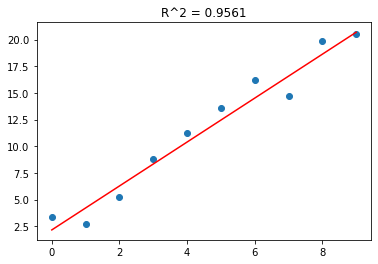

In [27]:
y_hat = model(x_train)[:,0].detach().numpy()

r = r_2(y_hat, y)

plt.scatter(x, y)
plt.plot(x, y_hat, color='red')
plt.title(f'R^2 = {r:.4f}')
plt.show()